# Churn Prediction For Bank Customer

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

## Improt Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (12,6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Indest Data

In [4]:
df = pd.read_csv("data/Churn_Modelling.csv")

## Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.shape

(10000, 14)

In [8]:
df.isna().sum().any()

False

In [9]:
df.drop(["RowNumber","CustomerId","Surname"], axis=1, inplace=True)

In [10]:
df.shape

(10000, 11)

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480
Exited,10000.000,0.204,0.403,0.000,0.000,0.000,0.000,1.000


In [12]:
df['Gender'].replace({'Male':0, 'Female':1}, inplace=True)

<AxesSubplot:>

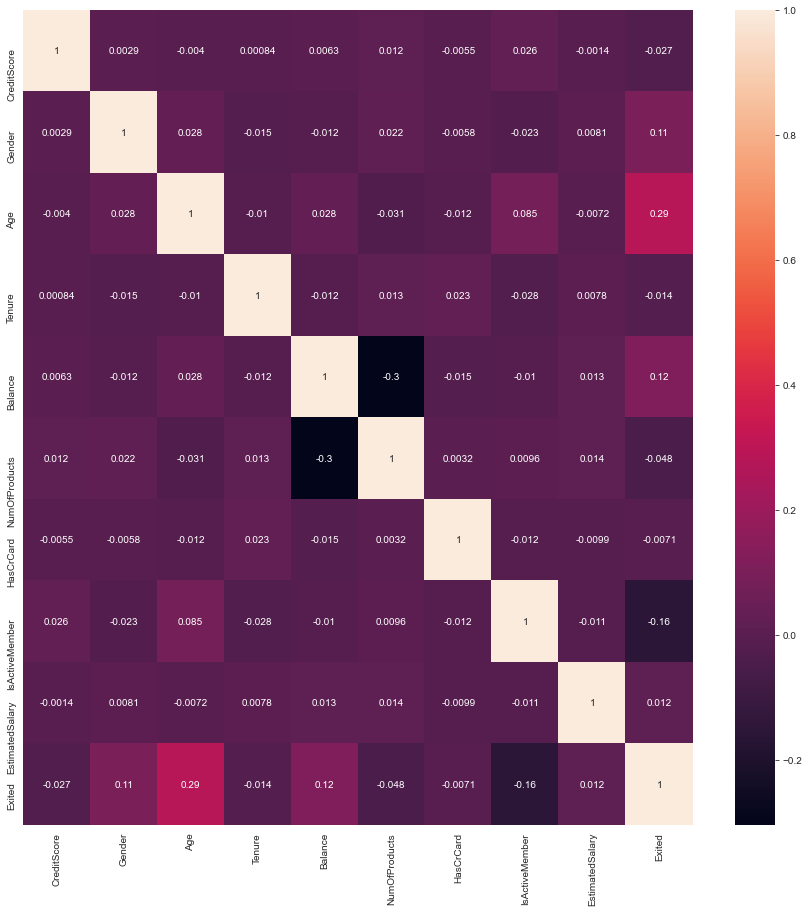

In [13]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)

In [14]:
df.Balance.value_counts()

0.000         3617
105473.740       2
130170.820       2
72594.000        1
139723.900       1
              ... 
130306.490       1
92895.560        1
132005.770       1
166287.850       1
104001.380       1
Name: Balance, Length: 6382, dtype: int64

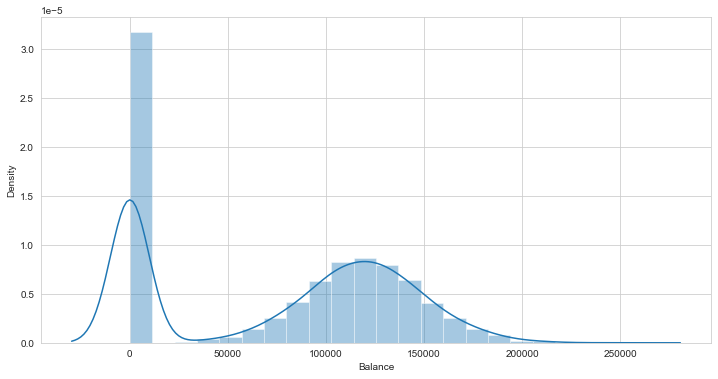

In [15]:
sns.distplot(df.Balance, hist=True);

- Sıfır bakiyesi olan çok sayıda müşteri olduğu için, bir müşterinin sıfır bakiyesi olup olmadığını gösteren yeni bir feature oluşturuyorum.

In [16]:
df['Balance_binary'] = df['Balance'].where(df['Balance'] == 0, 1)  # Balence' da 0 olan değerleri yeni sütuna 0 olarak diğerlerini 1 olarak atıyor.

In [17]:
df['Balance_binary'].value_counts()

1.000    6383
0.000    3617
Name: Balance_binary, dtype: int64

In [18]:
df.drop('Balance', axis=1, inplace=True)

In [19]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Balance_binary
0,619,France,1,42,2,1,1,1,101348.880,1,0.000
1,608,Spain,1,41,1,1,0,1,112542.580,0,1.000
2,502,France,1,42,8,3,1,0,113931.570,1,1.000
3,699,France,1,39,1,2,0,0,93826.630,0,0.000
4,850,Spain,1,43,2,1,1,1,79084.100,0,1.000


In [20]:
df.Age.value_counts()

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
88      1
82      1
85      1
83      1
Name: Age, Length: 70, dtype: int64

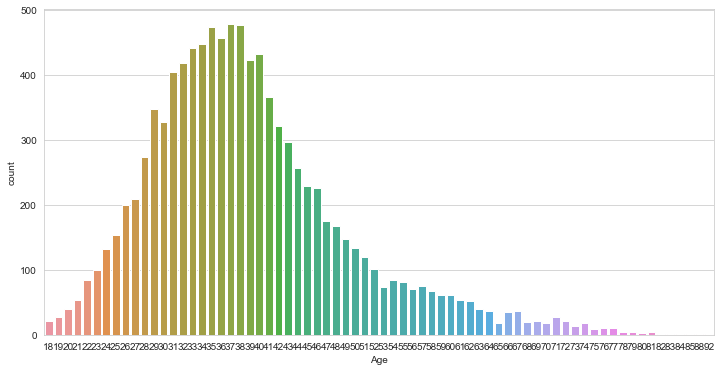

In [21]:
sns.countplot(df.Age);


<AxesSubplot:ylabel='Age'>

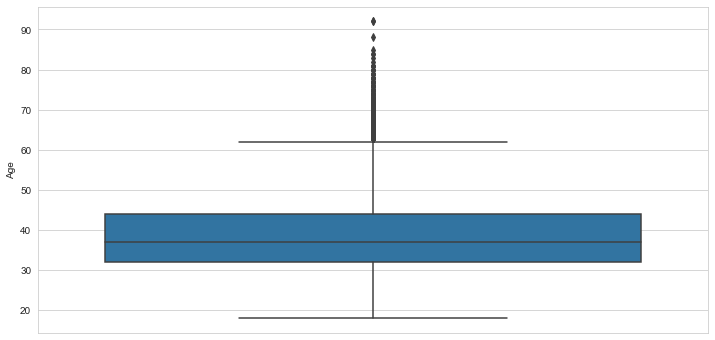

In [22]:
sns.boxplot(y=df['Age'])

In [23]:
Q1 = np.quantile(df['Age'],0.95)
df = df[df['Age'] < Q1]
df.shape
(9474, 14)

(9474, 14)

In [24]:
df[['Exited','Age']].groupby('Exited').mean()

,Age
Exited,
0,35.890
1,43.379


In [25]:
df.Tenure.value_counts()

2     994
8     980
7     979
1     974
5     952
3     950
4     948
9     926
6     919
10    462
0     390
Name: Tenure, dtype: int64

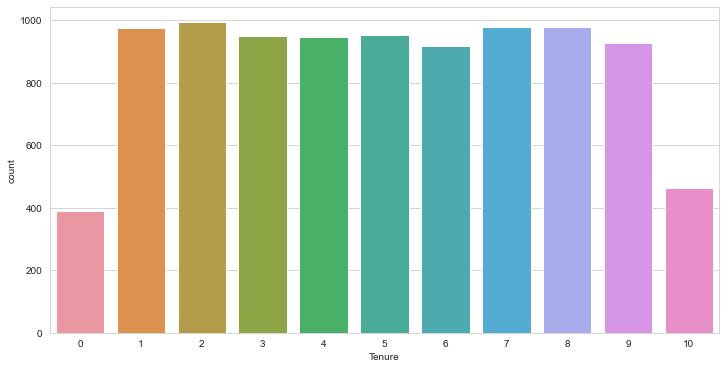

In [26]:
sns.countplot(df.Tenure);

In [27]:
df.Exited.value_counts()

0    7584
1    1890
Name: Exited, dtype: int64

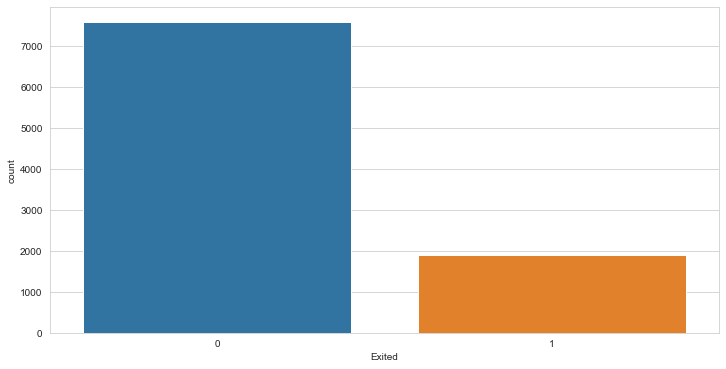

In [28]:
sns.countplot(df.Exited);

In [29]:
df.Gender.value_counts()

0    5172
1    4302
Name: Gender, dtype: int64

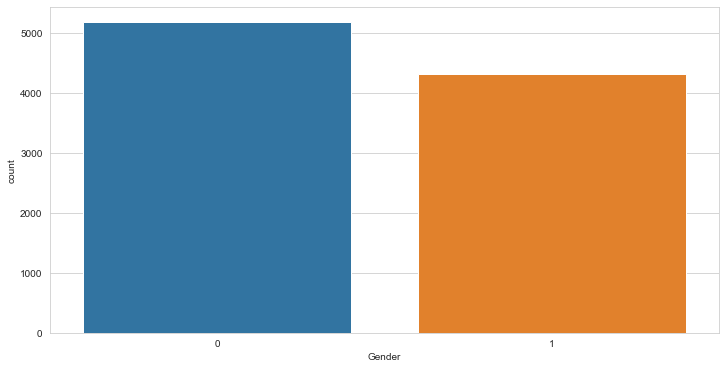

In [30]:
sns.countplot(df.Gender);

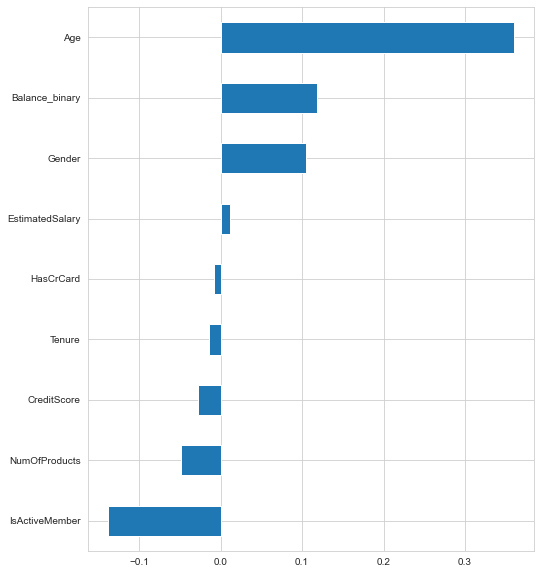

In [31]:
plt.figure(figsize = (8,10))
df.corr()['Exited'].sort_values().drop("Exited").plot(kind = "barh");

In [32]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Balance_binary
0,619,France,1,42,2,1,1,1,101348.880,1,0.000
1,608,Spain,1,41,1,1,0,1,112542.580,0,1.000
2,502,France,1,42,8,3,1,0,113931.570,1,1.000
3,699,France,1,39,1,2,0,0,93826.630,0,0.000
4,850,Spain,1,43,2,1,1,1,79084.100,0,1.000


## Preprocessing of Data
- Train | Test Split, Scalling

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [34]:
X = df.drop('Exited', axis=1)
y = df['Exited'].values

In [35]:
X = pd.get_dummies(X)

X.head()

,CreditScore,Gender,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Balance_binary,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,1,1,1,101348.880,0.000,1,0,0
1,608,1,41,1,1,0,1,112542.580,1.000,0,0,1
2,502,1,42,8,3,1,0,113931.570,1.000,1,0,0
3,699,1,39,1,2,0,0,93826.630,0.000,1,0,0
4,850,1,43,2,1,1,1,79084.100,1.000,0,0,1


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.10, random_state = 42)

In [37]:
scaler = MinMaxScaler()

In [38]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modelling & Model Performance

### Import related libraries

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

### Creating Model

### without class_weigth

In [40]:
X_train.shape

(8526, 12)

In [41]:
X_test.shape

(948, 12)

### *EarlyStopping*

In [42]:
model = Sequential()

model.add(Dense(12, activation = "relu"))
model.add(Dense(12, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [43]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15)

In [44]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
240/240 [==============================] - 1s 2ms/step - loss: 0.5298 - accuracy: 0.7777 - val_loss: 0.4884 - val_accuracy: 0.7960
Epoch 2/1000
240/240 [==============================] - 0s 1ms/step - loss: 0.4681 - accuracy: 0.8015 - val_loss: 0.4728 - val_accuracy: 0.7960
Epoch 3/1000
240/240 [==============================] - 0s 1ms/step - loss: 0.4511 - accuracy: 0.8044 - val_loss: 0.4575 - val_accuracy: 0.8077
Epoch 4/1000
240/240 [==============================] - 0s 1ms/step - loss: 0.4328 - accuracy: 0.8126 - val_loss: 0.4382 - val_accuracy: 0.8136
Epoch 5/1000
240/240 [==============================] - 0s 1ms/step - loss: 0.4162 - accuracy: 0.8215 - val_loss: 0.4249 - val_accuracy: 0.8230
Epoch 6/1000
240/240 [==============================] - 0s 1ms/step - loss: 0.4072 - accuracy: 0.8269 - val_loss: 0.4248 - val_accuracy: 0.8230
Epoch 7/1000
240/240 [==============================] - 0s 1ms/step - loss: 0.4041 - accuracy: 0.8307 - val_loss: 0.4190 - val_accuracy:

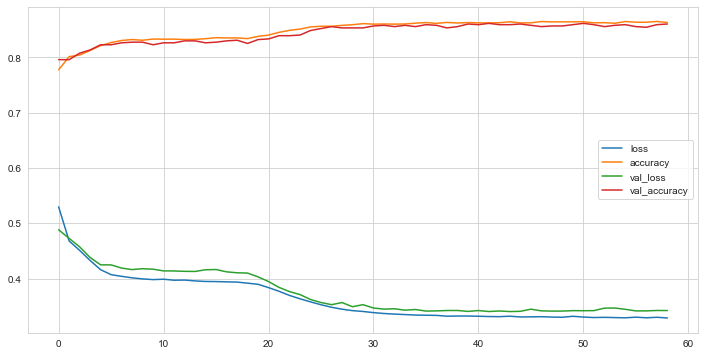

In [45]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [46]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[725  34]
 [112  77]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       759
           1       0.69      0.41      0.51       189

    accuracy                           0.85       948
   macro avg       0.78      0.68      0.71       948
weighted avg       0.83      0.85      0.83       948



### *learning_rate*

In [47]:
model = Sequential()

model.add(Dense(12, activation = "relu"))
model.add(Dense(12, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.005)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [48]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15)

In [49]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
240/240 [==============================] - 1s 2ms/step - loss: 0.4617 - accuracy: 0.7999 - val_loss: 0.4315 - val_accuracy: 0.8171
Epoch 2/1000
240/240 [==============================] - 0s 1ms/step - loss: 0.4131 - accuracy: 0.8244 - val_loss: 0.4165 - val_accuracy: 0.8324
Epoch 3/1000
240/240 [==============================] - 0s 1ms/step - loss: 0.4059 - accuracy: 0.8229 - val_loss: 0.4108 - val_accuracy: 0.8288
Epoch 4/1000
240/240 [==============================] - 0s 1ms/step - loss: 0.4000 - accuracy: 0.8290 - val_loss: 0.4030 - val_accuracy: 0.8347
Epoch 5/1000
240/240 [==============================] - 0s 1ms/step - loss: 0.3813 - accuracy: 0.8372 - val_loss: 0.3565 - val_accuracy: 0.8617
Epoch 6/1000
240/240 [==============================] - 0s 1ms/step - loss: 0.3524 - accuracy: 0.8546 - val_loss: 0.3535 - val_accuracy: 0.8499
Epoch 7/1000
240/240 [==============================] - 0s 1ms/step - loss: 0.3458 - accuracy: 0.8590 - val_loss: 0.3415 - val_accuracy:

<AxesSubplot:>

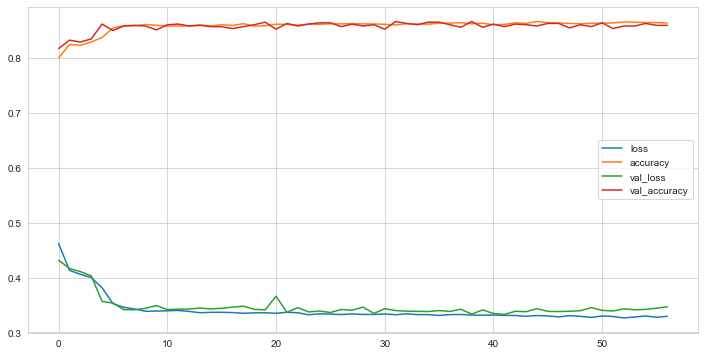

In [50]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [51]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[725  34]
 [112  77]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       759
           1       0.69      0.41      0.51       189

    accuracy                           0.85       948
   macro avg       0.78      0.68      0.71       948
weighted avg       0.83      0.85      0.83       948



### *Dropout*

In [52]:
model = Sequential()

model.add(Dense(30, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(15, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [53]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1, callbacks = [early_stop])

Epoch 1/1000
240/240 [==============================] - 1s 2ms/step - loss: 0.6265 - accuracy: 0.6932 - val_loss: 0.4970 - val_accuracy: 0.7960
Epoch 2/1000
240/240 [==============================] - 0s 1ms/step - loss: 0.5234 - accuracy: 0.7997 - val_loss: 0.4766 - val_accuracy: 0.7960
Epoch 3/1000
240/240 [==============================] - 0s 1ms/step - loss: 0.4924 - accuracy: 0.8005 - val_loss: 0.4668 - val_accuracy: 0.7960
Epoch 4/1000
240/240 [==============================] - 0s 1ms/step - loss: 0.4832 - accuracy: 0.8018 - val_loss: 0.4604 - val_accuracy: 0.7960
Epoch 5/1000
240/240 [==============================] - 0s 1ms/step - loss: 0.4718 - accuracy: 0.8037 - val_loss: 0.4535 - val_accuracy: 0.7960
Epoch 6/1000
240/240 [==============================] - 0s 1ms/step - loss: 0.4644 - accuracy: 0.8057 - val_loss: 0.4436 - val_accuracy: 0.7984
Epoch 7/1000
240/240 [==============================] - 0s 1ms/step - loss: 0.4611 - accuracy: 0.8056 - val_loss: 0.4394 - val_accuracy:

In [54]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 30)                390       
_________________________________________________________________
dropout (Dropout)            (None, 30)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 15)                465       
_________________________________________________________________
dropout_1 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 16        
Total params: 871
Trainable params: 871
Non-trainable params: 0
_________________________________________________________________


In [55]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.627,0.693,0.497,0.796
1,0.523,0.800,0.477,0.796
2,0.492,0.800,0.467,0.796
3,0.483,0.802,0.460,0.796
4,0.472,0.804,0.453,0.796


<AxesSubplot:>

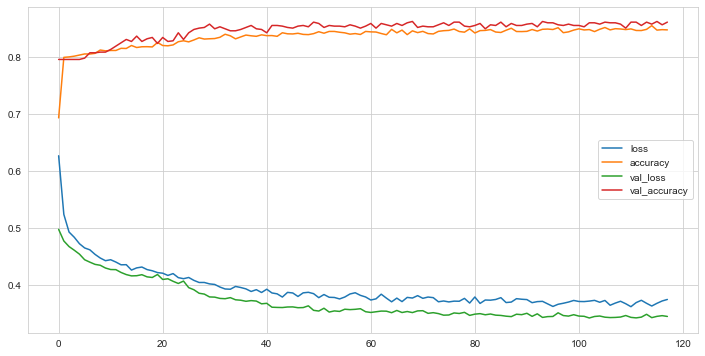

In [56]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

#### Evaluate

In [57]:
model.evaluate(X_test, y_test, verbose=0)

[0.35758939385414124, 0.8512658476829529]

In [58]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.35758939385414124
accuracy :  0.8512658476829529


In [59]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[731  28]
 [113  76]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       759
           1       0.73      0.40      0.52       189

    accuracy                           0.85       948
   macro avg       0.80      0.68      0.72       948
weighted avg       0.84      0.85      0.83       948



### with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

In [60]:
from sklearn.utils import class_weight

In [61]:
class_weight = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)

In [62]:
class_weight

array([0.62461538, 2.50617284])

In [63]:
class_weight[0]

0.6246153846153846

In [64]:
model_weighted = Sequential()

model_weighted.add(Dense(32, activation = "relu"))
model_weighted.add(Dense(16, activation = "relu"))
model_weighted.add(Dense(1, activation = "sigmoid"))

model_weighted.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [65]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15)

In [66]:
class_weight = {0: class_weight[0], 1:class_weight[1]}

In [67]:
class_weight

{0: 0.6246153846153846, 1: 2.506172839506173}

In [68]:
model_weighted.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop], class_weight = class_weight)

Epoch 1/1000
240/240 [==============================] - 1s 2ms/step - loss: 0.6496 - accuracy: 0.6016 - val_loss: 0.5962 - val_accuracy: 0.6975
Epoch 2/1000
240/240 [==============================] - 0s 1ms/step - loss: 0.5772 - accuracy: 0.7026 - val_loss: 0.6445 - val_accuracy: 0.6319
Epoch 3/1000
240/240 [==============================] - 0s 1ms/step - loss: 0.5565 - accuracy: 0.7137 - val_loss: 0.5509 - val_accuracy: 0.7151
Epoch 4/1000
240/240 [==============================] - 0s 1ms/step - loss: 0.5408 - accuracy: 0.7271 - val_loss: 0.5351 - val_accuracy: 0.7292
Epoch 5/1000
240/240 [==============================] - 0s 2ms/step - loss: 0.5268 - accuracy: 0.7477 - val_loss: 0.5829 - val_accuracy: 0.6917
Epoch 6/1000
240/240 [==============================] - 0s 1ms/step - loss: 0.5135 - accuracy: 0.7615 - val_loss: 0.4904 - val_accuracy: 0.7691
Epoch 7/1000
240/240 [==============================] - 0s 1ms/step - loss: 0.5002 - accuracy: 0.7662 - val_loss: 0.4723 - val_accuracy:

In [69]:
model_weighted.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 32)                416       
_________________________________________________________________
dense_10 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________


In [70]:
loss_df = pd.DataFrame(model_weighted.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.650,0.602,0.596,0.698
1,0.577,0.703,0.644,0.632
2,0.557,0.714,0.551,0.715
3,0.541,0.727,0.535,0.729
4,0.527,0.748,0.583,0.692


<AxesSubplot:>

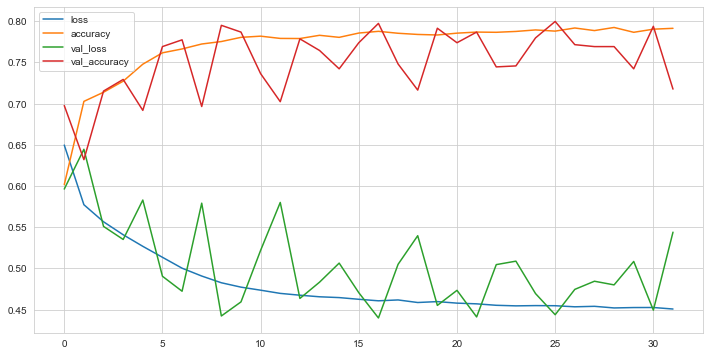

In [71]:
loss_df = pd.DataFrame(model_weighted.history.history)
loss_df.plot()

#### Evaluate

In [209]:
model_weighted.evaluate(X_test, y_test, verbose=0)

[0.5154175162315369, 0.7426160573959351]

In [72]:
loss, accuracy = model_weighted.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.5746896266937256
accuracy :  0.7109704613685608


In [73]:
y_pred = (model_weighted.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[520 239]
 [ 35 154]]
              precision    recall  f1-score   support

           0       0.94      0.69      0.79       759
           1       0.39      0.81      0.53       189

    accuracy                           0.71       948
   macro avg       0.66      0.75      0.66       948
weighted avg       0.83      0.71      0.74       948



## GridSearchCV

In [80]:
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 30, activation = 'relu'))
    classifier.add(Dense(units = 15, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [81]:
early_stop = EarlyStopping(monitor = "accuracy", mode = "auto", verbose = 1, patience = 15)

In [82]:
classifier = KerasClassifier(build_fn = build_classifier, epochs = 200)
parameters = {'batch_size': [32, 64],
              'optimizer': ['adam', 'rmsprop', "SGD", "adagrad", "adadelta"]}
grid_model = GridSearchCV(estimator = classifier,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1,
                          verbose = 1)
grid_model.fit(X_train, y_train, callbacks = [early_stop])

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Epoch 1/200
134/134 [==============================] - 1s 2ms/step - loss: 0.4954 - accuracy: 0.8005
Epoch 2/200
134/134 [==============================] - 0s 2ms/step - loss: 0.4585 - accuracy: 0.8044
Epoch 3/200
134/134 [==============================] - 0s 1ms/step - loss: 0.4408 - accuracy: 0.8130
Epoch 4/200
134/134 [==============================] - 0s 2ms/step - loss: 0.4250 - accuracy: 0.8193
Epoch 5/200
134/134 [==============================] - 0s 2ms/step - loss: 0.4139 - accuracy: 0.8243
Epoch 6/200
134/134 [==============================] - 0s 1ms/step - loss: 0.4079 - accuracy: 0.8261
Epoch 7/200
134/134 [==============================] - 0s 2ms/step - loss: 0.4052 - accuracy: 0.8275
Epoch 8/200
134/134 [==============================] - 0s 2ms/step - loss: 0.4032 - accuracy: 0.8306
Epoch 9/200
134/134 [==============================] - 0s 2ms/step - loss: 0.4021 - accuracy: 0.8304
Epoch 10/200
134/134 [======

GridSearchCV(cv=10,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x000001D994633CA0>,
             n_jobs=-1,
             param_grid={'batch_size': [32, 64],
                         'optimizer': ['adam', 'rmsprop', 'SGD', 'adagrad',
                                       'adadelta']},
             scoring='accuracy', verbose=1)

In [83]:
grid_model.best_score_

0.8592541375647397

In [84]:
grid_model.best_params_

{'batch_size': 64, 'optimizer': 'rmsprop'}

#### Evaluate

***ROC (Receiver Operating Curve) and AUC (Area Under Curve)*** 
***for keras_model***

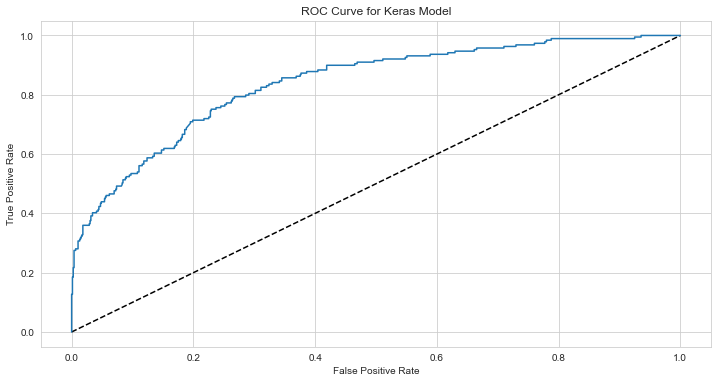

In [85]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Keras Model')
plt.show()

In [86]:
roc_auc_score(y_test, y_pred_proba)

0.8373730402715909

***for keras_model_weighted***

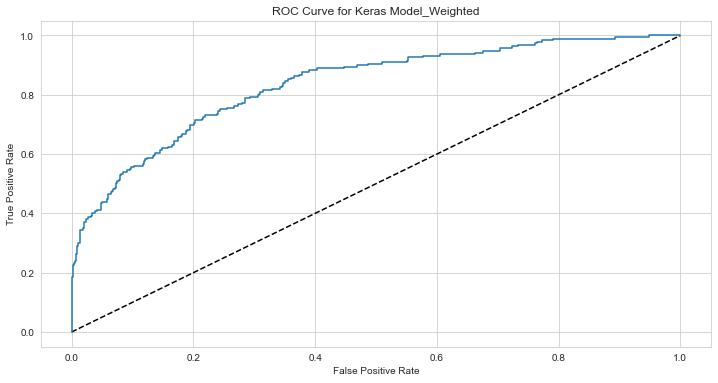

In [87]:
y_pred_proba = model_weighted.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Keras Model_Weighted')
plt.show()

In [88]:
roc_auc_score(y_test, y_pred_proba)

0.8342012255055733

***for grid_model***

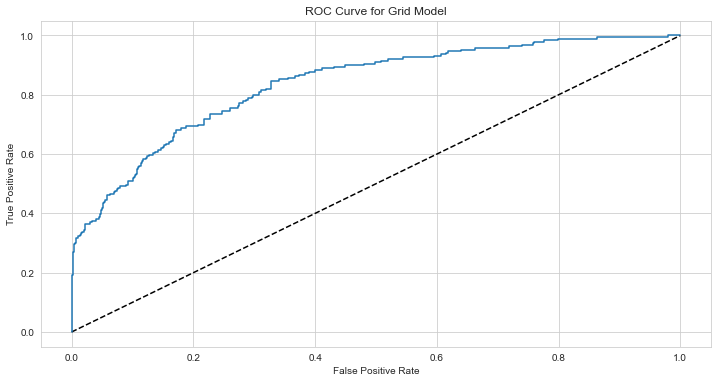

In [89]:
y_pred_proba = grid_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Grid Model')
plt.show()

In [90]:
roc_auc_score(y_test, y_pred_proba)

0.8352747628109947

## Final Model and Model Deployment

In [91]:
import pickle
pickle.dump(scaler, open("scaler_exited", 'wb'))

In [92]:
final_model = Sequential()

final_model.add(Dense(32, activation = "relu"))  
final_model.add(Dense(16, activation = "relu"))
final_model.add(Dense(1, activation = "sigmoid"))  
                                             

opt = Adam(lr = 0.005)
final_model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [93]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 20)

In [95]:
class_weight = {0: class_weight[0], 1:class_weight[1]}
class_weight

{0: 0.62787777, 1: 2.45499182}

In [96]:
final_model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop], class_weight = class_weight)

Epoch 1/1000
267/267 [==============================] - 1s 2ms/step - loss: 0.5904 - accuracy: 0.6945 - val_loss: 0.8729 - val_accuracy: 0.4937
Epoch 2/1000
267/267 [==============================] - 1s 2ms/step - loss: 0.5395 - accuracy: 0.7415 - val_loss: 0.5886 - val_accuracy: 0.7110
Epoch 3/1000
267/267 [==============================] - 1s 2ms/step - loss: 0.4930 - accuracy: 0.7698 - val_loss: 0.4887 - val_accuracy: 0.7595
Epoch 4/1000
267/267 [==============================] - 1s 2ms/step - loss: 0.4743 - accuracy: 0.7818 - val_loss: 0.6499 - val_accuracy: 0.6730
Epoch 5/1000
267/267 [==============================] - 0s 2ms/step - loss: 0.4666 - accuracy: 0.7821 - val_loss: 0.4434 - val_accuracy: 0.7975
Epoch 6/1000
267/267 [==============================] - 1s 2ms/step - loss: 0.4676 - accuracy: 0.7834 - val_loss: 0.5515 - val_accuracy: 0.7278
Epoch 7/1000
267/267 [==============================] - 0s 2ms/step - loss: 0.4623 - accuracy: 0.7911 - val_loss: 0.4784 - val_accuracy:

<AxesSubplot:>

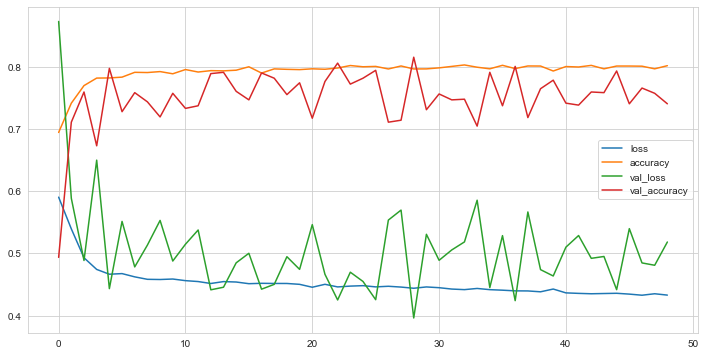

In [97]:
loss_df = pd.DataFrame(final_model.history.history)
loss_df.plot()

In [98]:
y_pred = (final_model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[553 206]
 [ 40 149]]
              precision    recall  f1-score   support

           0       0.93      0.73      0.82       759
           1       0.42      0.79      0.55       189

    accuracy                           0.74       948
   macro avg       0.68      0.76      0.68       948
weighted avg       0.83      0.74      0.76       948



In [99]:
model.save('model_exited.h5')

### Loading Model and Scaler

In [100]:
from tensorflow.keras.models import load_model

In [101]:
model_exited = load_model('model_exited.h5')
scaler_exited = pickle.load(open("scaler_exited", "rb"))

### Prediction

In [104]:
first_ten_customer = df.drop('Exited', axis = 1).iloc[0:10, :]
first_ten_customer

,CreditScore,Geography,Gender,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Balance_binary
0,619,France,1,42,2,1,1,1,101348.880,0.000
1,608,Spain,1,41,1,1,0,1,112542.580,1.000
2,502,France,1,42,8,3,1,0,113931.570,1.000
3,699,France,1,39,1,2,0,0,93826.630,0.000
4,850,Spain,1,43,2,1,1,1,79084.100,1.000
5,645,Spain,0,44,8,2,1,0,149756.710,1.000
6,822,France,0,50,7,2,1,1,10062.800,0.000
7,376,Germany,1,29,4,4,1,0,119346.880,1.000
8,501,France,0,44,4,2,0,1,74940.500,1.000
9,684,France,0,27,2,1,1,1,71725.730,1.000


In [103]:
first_ten_customer = scaler_exited.transform(first_ten_customer)
first_ten_customer

ValueError: could not convert string to float: 'France'

In [ ]:
(model_exited.predict(first_ten_customer) > 0.5).astype("int32")

array([[0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0]])

In [ ]:
df["Exited"].iloc[0:10]

0    1
1    0
2    1
3    0
4    0
5    1
6    0
7    1
8    0
9    0
Name: Exited, dtype: int64

### Prediction